# Thoracic Surgery Dataset

### Predicting whether a patient will survive the first year after lung cancer surgery - using machine learning.

### 1. Problem Definition

- In this project, the problem that we will be investigating is binary classification. We will use numbers of different features (information) about patients to predict whether they will survive the first year after surgery.

- The data is dedicated to classification problem related to the post-operative life expectancy in the lung cancer patients after thoracic surgery in which there are two classes class 1 - the death of patients within one year after surgery and class 2 – the patients who survive.

### 2. Data

The original data came from the kaggle. The database cantains 18 atributes (features), but here 16 atributes will be use. I will also add one feature myself.

The following are the features we'll use to predict our target variable (1 year survival period).


- ID

- DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)

- PRE4: Forced vital capacity - FVC (numeric)

- PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)

- PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)

- PRE7: Pain before surgery (T,F)

- PRE8: Haemoptysis before surgery (T,F)

- PRE9: Dyspnoea before surgery (T,F)

- PRE10: Cough before surgery (T,F)

- PRE11: Weakness before surgery (T,F)

- PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)

- PRE17: Type 2 DM - diabetes mellitus (T,F)

- PRE19: MI up to 6 months (T,F)

- PRE25: PAD - peripheral arterial diseases (T,F)

- PRE30: Smoking (T,F)

- PRE32: Asthma (T,F)

- AGE: Age at surgery (numeric)

- Risk1Y: 1 year survival period - (T)rue value if died (T,F)

- RATIO = PRE5/PRE4

### Data Lookup & Cleaning

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import plotly.express as px

#### Reading the Dataset and assigning that to the variable df 

In [2]:
df=pd.read_csv('ThoraricSurgery.csv')

#### Access the first 5 rows of a dataframe

In [3]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


#### Access the last 5 rows of a dataframe

In [4]:
df.tail()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F
469,470,DGN3,4.72,3.56,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F


#### Prints information about the DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


#### Check the number of missing values in each column

In [6]:
df.isna().sum()

id         0
DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

#### Statistical Information about the DataFrame

In [7]:
df.describe()

,id,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


#### Correlation

In [8]:
df.corr()

,id,PRE4,PRE5,AGE
id,1.000000,-0.034985,0.029563,-0.005826
PRE4,-0.034985,1.000000,0.032975,-0.290178
PRE5,0.029563,0.032975,1.000000,-0.115900
AGE,-0.005826,-0.290178,-0.115900,1.000000


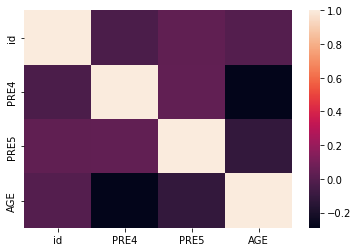

In [9]:
sns.heatmap(df.corr())
plt.show()

### Analysis of Data

#### change all the 'T' to 1 and 'F' to 0 in df2 using the lambda function

In [10]:
df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 
     'PRE30', 'PRE32']] = df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 
                            'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32']].apply(lambda x: np.where(x == 'T', 1, 0)) 

In [11]:
df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 
     'PRE25', 'PRE30', 'PRE32']].head()

,PRE7,PRE8,PRE9,PRE10,PRE11,PRE17,PRE19,PRE25,PRE30,PRE32
0,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,1,0


#### Percentage of the Risk of 1 year survival period

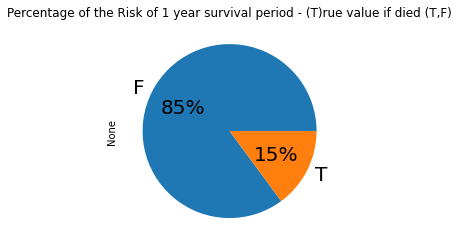

In [12]:
df.groupby('Risk1Yr').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%')
plt.title('Percentage of the Risk of 1 year survival period - (T)rue value if died (T,F)')
plt.show()

#### Observation 
- 85% of the patients were not survivied within the 1 year of survival period

In [13]:
df['DGN'].value_counts()

DGN3    349
DGN2     52
DGN4     47
DGN5     15
DGN6      4
DGN8      2
DGN1      1
Name: DGN, dtype: int64

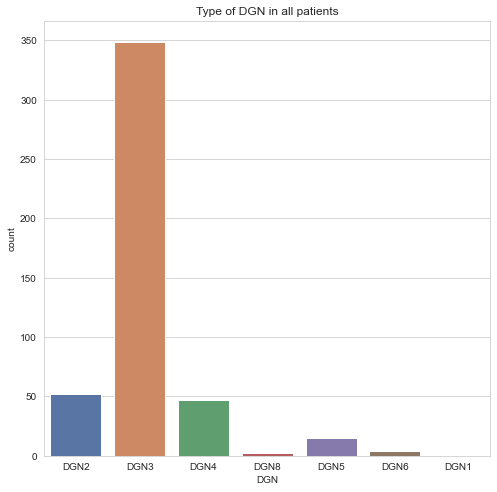

In [14]:
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Type of DGN in all patients")

sns.set(font_scale=2)
sns.countplot(x='DGN', data=df)
plt.show()

#### Observation
- DGN3 is the most common code that was present in all patients.

#### As you know smoking is bad for your health. Let's see if it had an effect on patients.

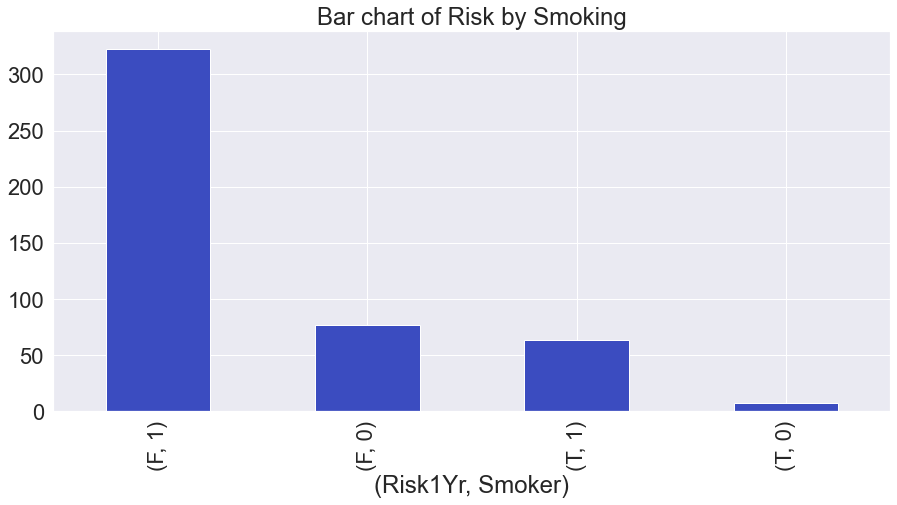

In [15]:
fig, ax = plt.subplots(figsize=(15,7))

df.groupby('Risk1Yr')['PRE30'].value_counts().plot(ax=ax, kind='bar', 
                                                    title = 'Bar chart of Risk by Smoking', colormap = 'coolwarm')
ax.set(xlabel = "(Risk1Yr, Smoker)")

plt.show()

#### Observation 
- This shows how many patients survived 1 year being a smoker (F,1)
- This shows how many patients survived 1 year without being a smoker (F,0)
- This shows how many patients did not survive 1 year being a smoker (T,1)
- This shows how many patients did not survive 1 year without being a smoker (T,0)

#### Type of OC in all patients

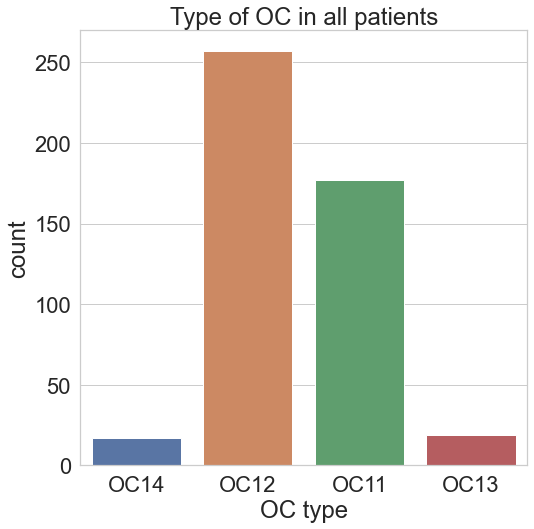

In [16]:
# this plot shows count of a given OC in all patients
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Type of OC in all patients")

sns.set(font_scale=2)
sns.countplot(x= 'PRE14', data = df)
ax.set_xlabel('OC type')

plt.show()

#### Observation
- OC12 is the most common code appears in all the patients

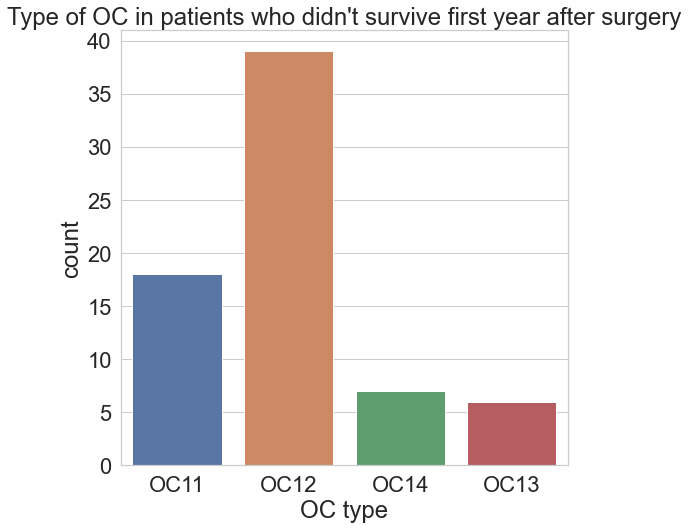

In [17]:
# this plot shows count of a given OC in patients who didnt survive 1st year
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=2)
ax.set_title("Type of OC in patients who didn't survive first year after surgery")
sns.countplot(x= 'PRE14',  data =df[df['Risk1Yr'] == 'T'])
ax.set_xlabel('OC type')

plt.show()

#### Observation
- OC12 patients didn't survive first year after surgery

### Convert all the categorical values to numerical values

In [18]:
df['DGN'].value_counts()

DGN3    349
DGN2     52
DGN4     47
DGN5     15
DGN6      4
DGN8      2
DGN1      1
Name: DGN, dtype: int64

In [19]:
df['PRE6'].value_counts()

PRZ1    313
PRZ0    130
PRZ2     27
Name: PRE6, dtype: int64

In [20]:
df['PRE14'].value_counts()

OC12    257
OC11    177
OC13     19
OC14     17
Name: PRE14, dtype: int64

In [21]:
df=df.drop('id',axis=1)

In [22]:
df.DGN=df.DGN.replace({"DGN3":3,"DGN2":2,"DGN4":4,"DGN5":5,"DGN6":0,"DGN8":8,"DGN1":1})

In [23]:
df.PRE6=df.PRE6.replace({"PRZ1":1,"PRZ0":0,"PRZ2":2})

In [24]:
df.PRE14=df.PRE14.replace({"OC12":2,"OC11":1,"OC13":3,"OC14":4})

In [25]:
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,F
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,F
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,F
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,F
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,T


In [26]:
df.dtypes

DGN          int64
PRE4       float64
PRE5       float64
PRE6         int64
PRE7         int32
PRE8         int32
PRE9         int32
PRE10        int32
PRE11        int32
PRE14        int64
PRE17        int32
PRE19        int32
PRE25        int32
PRE30        int32
PRE32        int32
AGE          int64
Risk1Yr     object
dtype: object

### Creation of a Model

#### Take the X and y value

In [44]:
x=df.drop('Risk1Yr',axis=1)

In [45]:
x

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2,3.88,2.12,1,0,0,0,1,0,3,0,0,0,1,0,63
466,3,3.76,3.12,0,0,0,0,0,0,1,0,0,0,1,0,61
467,3,3.04,2.08,1,0,0,0,1,0,3,0,0,0,0,0,52
468,3,1.96,1.68,1,0,0,0,1,1,2,0,0,0,1,0,79


In [46]:
y=df.Risk1Yr
y

0      F
1      F
2      F
3      F
4      T
      ..
465    F
466    F
467    F
468    F
469    F
Name: Risk1Yr, Length: 470, dtype: object

In [47]:
y.value_counts()

F    400
T     70
Name: Risk1Yr, dtype: int64

**Import the train_test_split from the sklearn**

In [48]:
from sklearn.model_selection import train_test_split

#### Split the Training Dataset and Test Dataset

In [49]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Import the DecisionTreeClassifier from the sklearn

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model=DecisionTreeClassifier()

#### Fitting the training data to the model

In [52]:
model.fit(x,y)

DecisionTreeClassifier()

### Prediction

In [53]:
y_predict=model.predict(X_test)

In [54]:
y_predict

array(['F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'F', 'F',
       'F', 'T', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'F',
       'F', 'F', 'T', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'T', 'F', 'F', 'F', 'T',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F',
       'F', 'T', 'F'], dtype=object)

### Accuracy

#### Import the accuracy_score from the sklearn

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test,y_predict)*100

100.0

### Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
performance=confusion_matrix(y_test,y_predict)

In [59]:
performance

array([[82,  0],
       [ 0, 12]], dtype=int64)

#### Import the plot_confusion_matrix from the sklearn

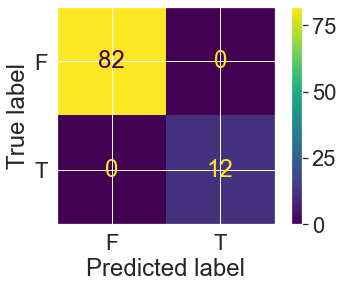

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)
plt.show()

#### Decision Tree Structure

In [62]:
from sklearn import tree

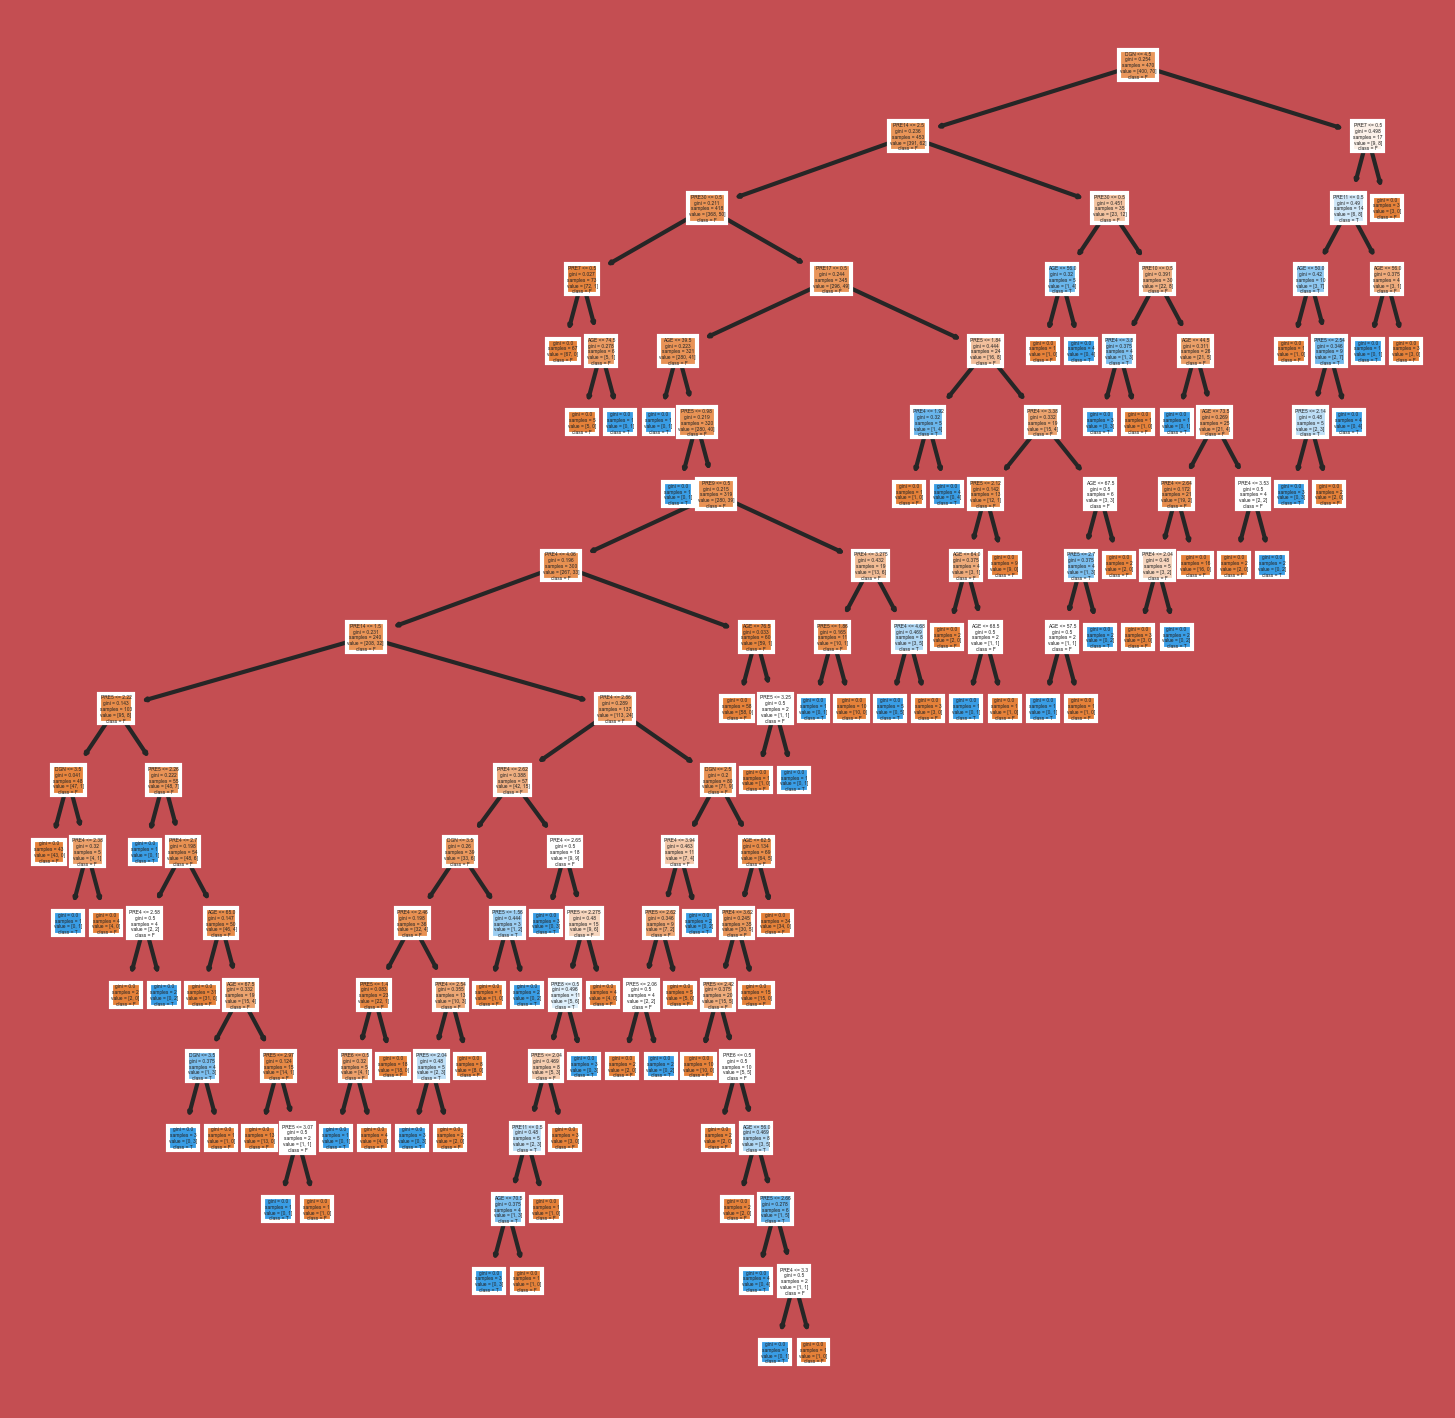

In [64]:
feature_names=['DGN','PRE4','PRE5','PRE6','PRE7','PRE8','PRE9','PRE10','PRE11','PRE14','PRE17','PRE19','PRE25','PRE30','PRE32','AGE']
class_names=['F','T']
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=300,facecolor='r')
tree.plot_tree(model,feature_names=feature_names,class_names=class_names,filled=True)
fig.savefig('Thoracic Surgery Dataset.png')

#### Conclusion
- Overall Accuracy = **100%**